In [1]:
import ROOT

file = ROOT.TFile("muons_v2.root")
file.ls()

TFile**		muons_v2.root	
 TFile*		muons_v2.root	
  KEY: TTree	t3333;1	Combined Ntuple


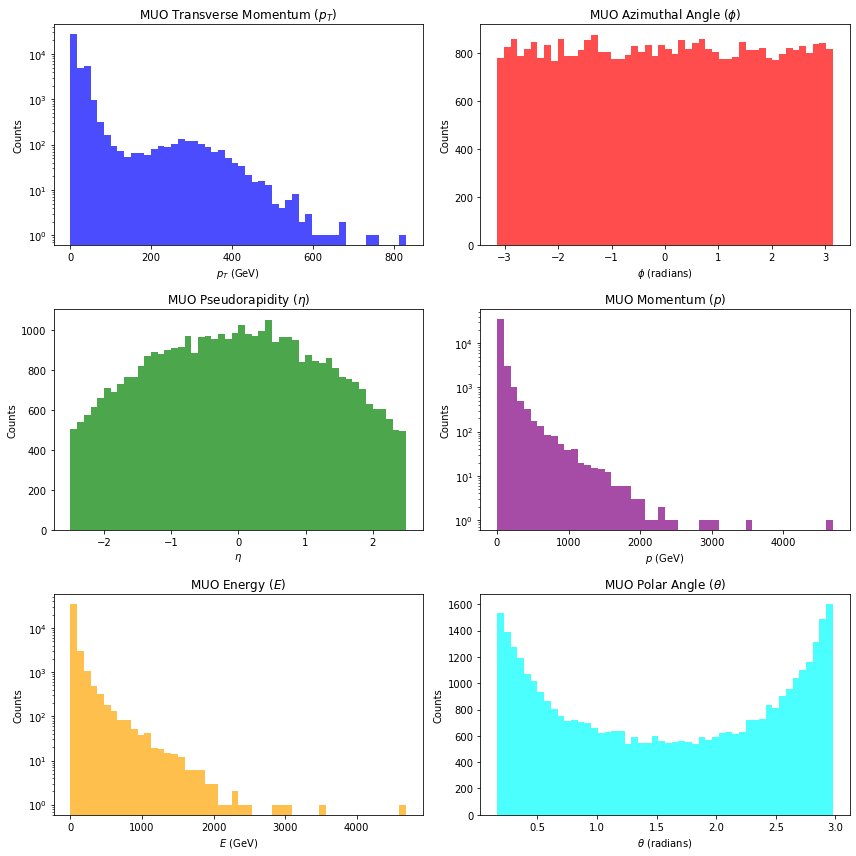

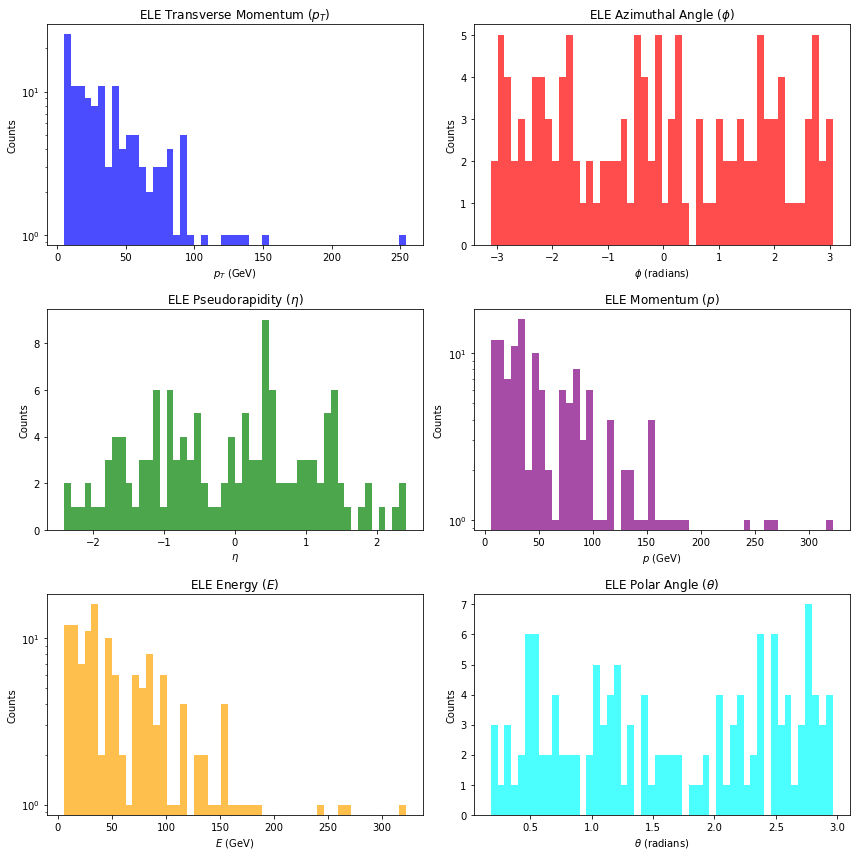

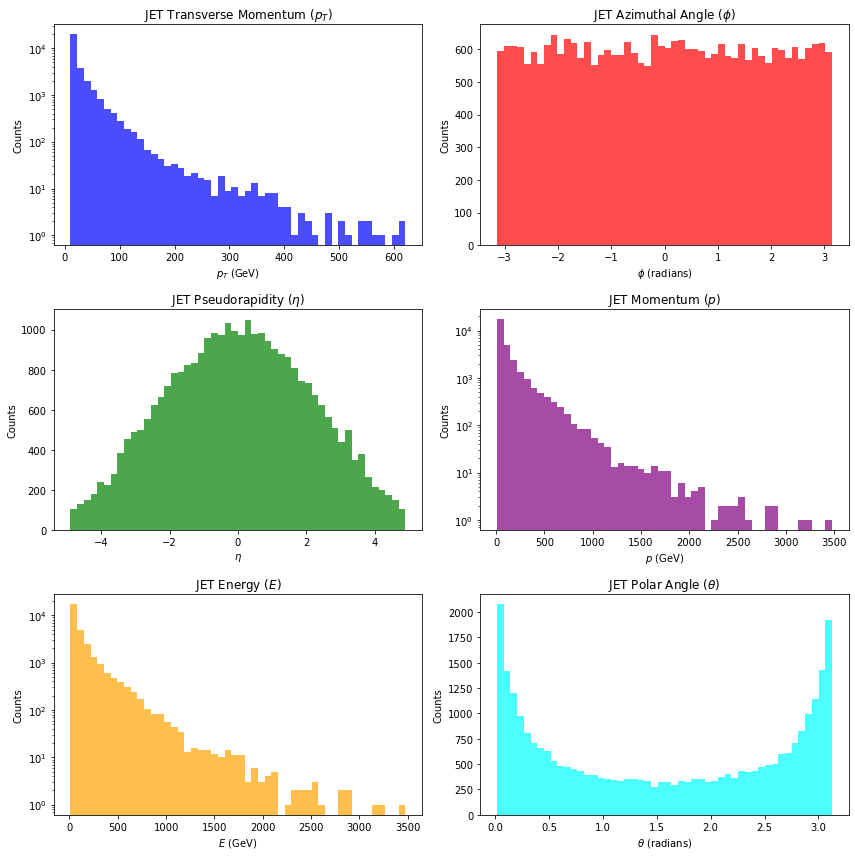

In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

file = ROOT.TFile("muons_v2.root")
tree = file.Get("t3333")  

def transverse_momentum(px, py):
    return np.sqrt(px**2 + py**2)

def total_momentum(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def pseudorapidity(px, py, pz):
    p = total_momentum(px, py, pz)
    theta = np.arccos(pz / p)
    return -np.log(np.tan(theta / 2))

def azimuthal_angle(px, py):
    return np.arctan2(py, px)

def polar_angle(px, py, pz):
    pt = transverse_momentum(px, py)
    return np.arctan2(pt, pz)

def plot_kinematic_distributions(tree, particle, px_branch, py_branch, pz_branch, e_branch, n_branch):
    px, py, pz, e = [], [], [], []
    for i in range(tree.GetEntries()):
        tree.GetEntry(i)
        num_particles = getattr(tree, n_branch)
        
        if num_particles == 0:
            continue
        for j in range(num_particles):
            px.append(getattr(tree, px_branch)[j] / 1000)  #Convert MeV to GeV
            py.append(getattr(tree, py_branch)[j] / 1000)
            pz.append(getattr(tree, pz_branch)[j] / 1000)
            e.append(getattr(tree, e_branch)[j] / 1000)
            
    px, py, pz, e = np.array(px), np.array(py), np.array(pz), np.array(e)
    pt = transverse_momentum(px, py)
    p = total_momentum(px, py, pz)
    eta = pseudorapidity(px, py, pz)
    phi = azimuthal_angle(px, py)
    theta = polar_angle(px, py, pz)

    fig, axs = plt.subplots(3, 2, figsize=(12, 12))
    plot_info = [
        (pt, f"{particle} Transverse Momentum ($p_T$)", "$p_T$ (GeV)", "blue", True),
        (phi, f"{particle} Azimuthal Angle ($\phi$)", "$\phi$ (radians)", "red", False),
        (eta, f"{particle} Pseudorapidity ($\eta$)", "$\eta$", "green", False),
        (p, f"{particle} Momentum ($p$)", "$p$ (GeV)", "purple", True),
        (e, f"{particle} Energy ($E$)", "$E$ (GeV)", "orange", True),
        (theta, f"{particle} Polar Angle ($\\theta$)", "$\\theta$ (radians)", "cyan", False)]

    for i, (data, title, xlabel, color, log_scale) in enumerate(plot_info):
        axs[i // 2, i % 2].hist(data, bins=50, alpha=0.7, color=color)
        axs[i // 2, i % 2].set_title(title)
        axs[i // 2, i % 2].set_xlabel(xlabel)
        axs[i // 2, i % 2].set_ylabel("Counts")
        if log_scale:
            axs[i // 2, i % 2].set_yscale("log")

    plt.tight_layout()
    plt.show()
plot_kinematic_distributions(tree, "MUO", "PXMUO", "PYMUO", "PZMUO", "EEMUO", "NMUO")  #Muons
plot_kinematic_distributions(tree, "ELE", "PXELE", "PYELE", "PZELE", "EEELE", "NELE")  #Electrons
plot_kinematic_distributions(tree, "JET", "PXJET", "PYJET", "PZJET", "EEJET", "NJET")  #Jets